
<a id='coase'></a>

# Estimating the number of advanced AI system with Coase’s Theory of the Firm

As discussed in our article _Can the pin factory defeat the paperclip factory?_, we think that the framework developed by Ronal Coase in his seminal articile _The nature of the firm_ (1937) is useful to understand how power-seeking AIs may interact with each other. 

Our model is basically a reintreptation of the paper _Span of control, transaction costs, and the structure of production chains_ (Kikuchi et al, 2018) withing the Artificial Governance. The complete proofs are available on the paper.

## Modelling agentic AIs

In the model, we will assume that an advanced AI system is given a problem that can be divide in taks. This first advanced AI system will decide if it will try solve the whole problem (analagous to seeking control of a whole system. The whole description is our paper and at Kikuchi et al, 2018.

Formally, the tasks that the AI controls are indexed by $m \in [0,1]$, in which, $m = 0$ means that no action was undertaken, while $m = 1$ means that the problem solving is complete.  

The first AI system will be held responsible for a given system. It will decide if it will directly control all the systems or not. If not, it uses the input of other AI systems. We will can  the percentage of the scenario controlled by the AI system $l_1$ . This second AI system will do the same decision: do all the rest of the task or decide to delegate to a third AI system (i.e, it will decide $l_2$ ). The third AI system will do the same decision and so forth,  in a recursive manner. 



## Equilibrium

The equilibrium is found when no AI system has incentive to deviate, has a reward function equal to zero, and no AI system has incentive to enter. The existence of uniques of equilibrum is shown by fixed point theorems methods and may be encountered with dynamic program. 

## The code

Since these optmization problems don't generally have analitcally soluctions, we will solve it analitically, basing making a few adaptations of the Chapter 15 of the book Quantitative Economics with Python,  by Sargent and Stachurski (2023). It follows the steps below:


1. _fix initial condition $ p \in \mathcal P $,_  
1. _iterate with $ T $ until $ T^n p $ has converged to $ p^* $, and_  
1. _recover firm choices via the choice function [(15.3)]_ (Sargent and Stachurski (2023)


It picewise interpolation of functions at each steps.
To begin, here’s a class to store primitives and a grid:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fminbound
from interpolation import interp

class AI_Chain:

    def __init__(self,
            n=1000,
            delta=1.05,
            c=lambda m: np.exp(10 * m) - 1):

        self.n, self.delta, self.c = n, delta, c
        self.grid = np.linspace(1e-04, 1, n)

Now we iterate with $M $ until we reach convergence:

In [2]:
def compute_prices(pc, tol=1e-5, max_iter=10):
    """
    Compute prices by iterating with M

        * pc is an instance of AI_Chain
        * The initial condition is p = c

    """
    delta, c, n, grid = pc.delta, pc.c, pc.n, pc.grid
    p = c(grid)  # Initial condition is c(s), as an array
    new_p = np.empty_like(p)
    error = 1+tol 
    i = 0

    while error > tol and i < max_iter:
    #while i < max_iter:
        for j, s in enumerate(grid):
            Tp = lambda m: delta * interp(grid, p, m) + c(s - m)
            new_p[j] = Tp(fminbound(Tp, 0, s))
        error = np.max(np.abs(p - new_p))
        p = new_p
        i = i + 1

    if i < max_iter:
        print(f"Iteration converged in {i} steps")
    else:
        print(f"Warning: iteration hit upper bound {max_iter}")

    p_func = lambda x: interp(grid, p, x)
    return p_func

The next function computes optimal choice of upstream boundary and range of
task implemented for a AI system faced with price function p_function and with downstream boundary $ s $.

In [3]:
def optimal_choices(pc, p_function, s):
    """
    Takes p_func as the true function, minimizes on [0,s]

    Returns optimal upstream boundary m_star and optimal size of
    firm ell_star

    In fact, the algorithm minimizes on [-1,s] and then takes the
    max of the minimizer and zero. This results in better results
    close to zero

    """
    delta, c = pc.delta, pc.c
    f = lambda m: delta * p_function(m) + c(s - m)
    m_star = max(fminbound(f, -1, s), 0)
    ell_star = s - m_star
    return m_star, ell_star

To determine the allocation of AI systems, we recursively step through each system’s choices of their respective upstream boundary. We treat the previous AI system’s upstream boundary as their own downstream boundary. We start with firm 1, whose downstream boundary is $s=1$.

In [4]:
def compute_stages(pc, p_function):
    s = 1.0
    transaction_stages = [s]
    while s > 0:
        s, ell = optimal_choices(pc, p_function, s)
        transaction_stages.append(s)
    return np.array(transaction_stages)

We will test this using the default settings. The next graph displays the equilibrium price function and the vertical lines represent the limits of AI systems.

Iteration converged in 2 steps


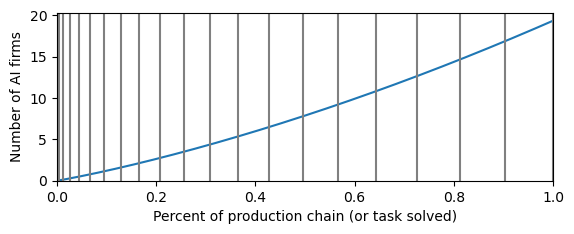

In [5]:
pc = AI_Chain()
p_star = compute_prices(pc)

transaction_stages = compute_stages(pc, p_star)

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

ax.plot(pc.grid, p_star(pc.grid))
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0)
for s in transaction_stages:
    ax.axvline(x=s, c="0.5")
plt.ylabel('Number of AI firms', fontsize=10)
plt.xlabel('Percent of production chain (or task solved)', fontsize=10)
plt.show()

## Plotting the number of AI systems

Iteration converged in 2 steps
When delta=1.4142135623730951 there are 28 AI systems
Iteration converged in 2 steps
When delta=2.0 there are 25 AI systems
Iteration converged in 2 steps
When delta=2.8284271247461903 there are 24 AI systems
Iteration converged in 2 steps
When delta=4.0 there are 24 AI systems
Iteration converged in 2 steps
When delta=5.656854249492381 there are 23 AI systems
Iteration converged in 2 steps
When delta=8.0 there are 23 AI systems
Iteration converged in 2 steps
When delta=11.313708498984761 there are 23 AI systems
Iteration converged in 2 steps
When delta=16.0 there are 22 AI systems
Iteration converged in 2 steps
When delta=22.627416997969522 there are 22 AI systems
Iteration converged in 2 steps
When delta=32.0 there are 22 AI systems
Iteration converged in 2 steps
When delta=45.254833995939045 there are 22 AI systems
Iteration converged in 2 steps
When delta=64.0 there are 21 AI systems
Iteration converged in 2 steps
When delta=90.50966799187809 there ar

Iteration converged in 2 steps
When delta=4503599627370496.0 there are 2 AI systems
Iteration converged in 2 steps
When delta=6369051672525773.0 there are 2 AI systems
Iteration converged in 2 steps
When delta=9007199254740992.0 there are 2 AI systems
Iteration converged in 2 steps
When delta=1.2738103345051546e+16 there are 2 AI systems
Iteration converged in 2 steps
When delta=1.8014398509481984e+16 there are 2 AI systems
Iteration converged in 2 steps
When delta=2.5476206690103092e+16 there are 2 AI systems
Iteration converged in 2 steps
When delta=3.602879701896397e+16 there are 2 AI systems
Iteration converged in 2 steps
When delta=5.0952413380206184e+16 there are 2 AI systems
Iteration converged in 2 steps
When delta=7.205759403792794e+16 there are 2 AI systems
Iteration converged in 2 steps
When delta=1.0190482676041237e+17 there are 2 AI systems
Iteration converged in 2 steps
When delta=1.4411518807585587e+17 there are 2 AI systems
Iteration converged in 2 steps
When delta=2.03

Iteration converged in 2 steps
When delta=6.338253001141147e+29 there are 2 AI systems
Iteration converged in 2 steps
When delta=8.963643355965783e+29 there are 2 AI systems


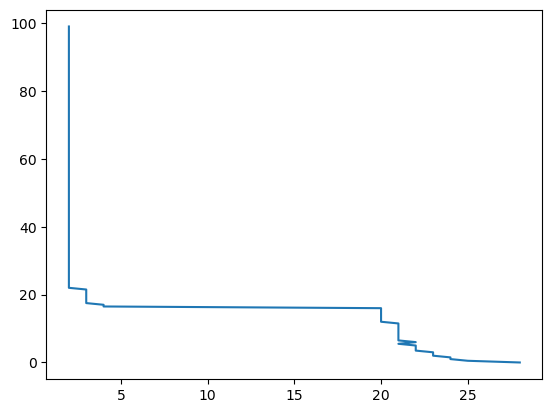

In [6]:
def get_number_of_AI_systems_given_delta(lower_bound = 0, upper_bound = 10, step = 0.1):
    
    num_AI_systems_given_delta = []
    for lndelta in np.arange(lower_bound, upper_bound, step): 
        delta = 2**lndelta
        if delta > 1:
            pc = AI_Chain(delta=delta)
            p_star = compute_prices(pc)
            transaction_stages = compute_stages(pc, p_star)
            num_AI_systems = len(transaction_stages)
            num_AI_systems_given_delta.append(num_AI_systems)
            print(f"When delta={delta} there are {num_AI_systems} AI systems")
    
    return num_AI_systems_given_delta, np.arange(lower_bound, upper_bound, step)[ : -1]
    
x, y = get_number_of_AI_systems_given_delta(0, 100, 0.5)
#plt.plot(x, y)

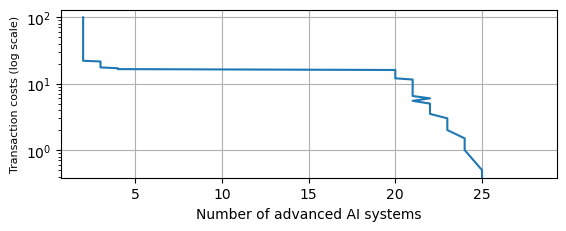

In [7]:
import pylab
import matplotlib.pyplot as plt
#a = [pow(10, i) for i in range(10)]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

plt.plot(x, y)
plt.yscale('log')
plt.grid()
plt.ylabel('Transaction costs (log scale)', fontsize=8)
plt.xlabel('Number of advanced AI systems', fontsize=10)

ax.set_yscale('log')


ax = plt.gca()
plt.show()